In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../merged_data/clean_data_train.csv')
df_future = pd.read_csv('../merged_data/clean_data_future_train.csv')

In [7]:
df = martin_clean_and_drop(df)

Text(0, 0.5, 'number of cases')

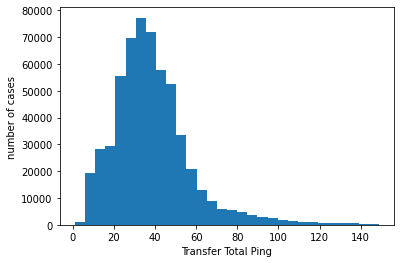

In [8]:
plt.hist(df['Transfer_Total_Ping'], bins=30)
plt.xlabel('Transfer Total Ping')
plt.ylabel('number of cases')

In [24]:
calculate_percentage(df, 'Transfer_Total_Ping >= 0 and Transfer_Total_Ping < 10')
calculate_percentage(df, 'Transfer_Total_Ping >= 10 and Transfer_Total_Ping < 20')
calculate_percentage(df, 'Transfer_Total_Ping >= 20 and Transfer_Total_Ping < 30')
calculate_percentage(df, 'Transfer_Total_Ping >= 30 and Transfer_Total_Ping < 40')
calculate_percentage(df, 'Transfer_Total_Ping >= 40 and Transfer_Total_Ping < 50')
calculate_percentage(df, 'Transfer_Total_Ping >= 50 and Transfer_Total_Ping < 60')
calculate_percentage(df, 'Transfer_Total_Ping >= 60 and Transfer_Total_Ping < 80')
calculate_percentage(df, 'Transfer_Total_Ping >= 80')

Transfer_Total_Ping >= 0 and Transfer_Total_Ping < 10: 2.40%
Transfer_Total_Ping >= 10 and Transfer_Total_Ping < 20: 10.03%
Transfer_Total_Ping >= 20 and Transfer_Total_Ping < 30: 20.60%
Transfer_Total_Ping >= 30 and Transfer_Total_Ping < 40: 26.21%
Transfer_Total_Ping >= 40 and Transfer_Total_Ping < 50: 20.05%
Transfer_Total_Ping >= 50 and Transfer_Total_Ping < 60: 10.41%
Transfer_Total_Ping >= 60 and Transfer_Total_Ping < 80: 6.41%
Transfer_Total_Ping >= 80: 3.88%


0.03884902400984733

In [10]:
df_future = clean_and_drop(df_future)

In [11]:
# 檢查一下 area_ping, Transfer_Total_Ping 之間的不同之後，決定使用 Transfer_Total_Ping
# 作為建物轉移的坪數
df_future[['area_ping', 'Transfer_Total_Ping']]

,area_ping,Transfer_Total_Ping
1,3.0,33.0
2,2.0,27.0
3,2.0,27.0
4,4.0,39.0
5,4.0,39.0
...,...,...
203745,11.0,27.0
203746,12.0,29.0
203748,5.0,20.0
203749,5.0,35.0


Text(0, 0.5, 'number of cases')

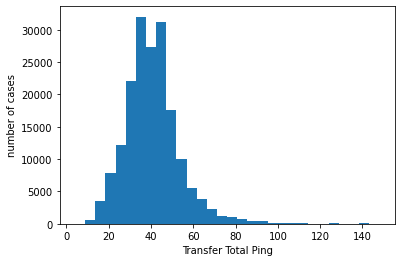

In [12]:
plt.hist(df_future['Transfer_Total_Ping'], bins=30)
plt.xlabel('Transfer Total Ping')
plt.ylabel('number of cases')


In [25]:
calculate_percentage(df_future, 'Transfer_Total_Ping >= 0 and Transfer_Total_Ping < 10')
calculate_percentage(df_future, 'Transfer_Total_Ping >= 10 and Transfer_Total_Ping < 20')
calculate_percentage(df_future, 'Transfer_Total_Ping >= 20 and Transfer_Total_Ping < 30')
calculate_percentage(df_future, 'Transfer_Total_Ping >= 30 and Transfer_Total_Ping < 40')
calculate_percentage(df_future, 'Transfer_Total_Ping >= 40 and Transfer_Total_Ping < 50')
calculate_percentage(df_future, 'Transfer_Total_Ping >= 50 and Transfer_Total_Ping < 60')
calculate_percentage(df_future, 'Transfer_Total_Ping >= 60 and Transfer_Total_Ping < 80')
calculate_percentage(df_future, 'Transfer_Total_Ping >= 80')

Transfer_Total_Ping >= 0 and Transfer_Total_Ping < 10: 0.02%
Transfer_Total_Ping >= 10 and Transfer_Total_Ping < 20: 2.82%
Transfer_Total_Ping >= 20 and Transfer_Total_Ping < 30: 14.79%
Transfer_Total_Ping >= 30 and Transfer_Total_Ping < 40: 32.12%
Transfer_Total_Ping >= 40 and Transfer_Total_Ping < 50: 31.58%
Transfer_Total_Ping >= 50 and Transfer_Total_Ping < 60: 11.67%
Transfer_Total_Ping >= 60 and Transfer_Total_Ping < 80: 5.63%
Transfer_Total_Ping >= 80: 1.38%


0.013767174411854145

In [18]:
def calculate_percentage(df, condition, verbose=True):
    total_cases = df.shape[0]
    df_ = df.query(condition)
    cases_of_interest = df_.shape[0]
    
    percentage_of_interest = cases_of_interest / total_cases
    if verbose:
        print(f'{condition}: {percentage_of_interest * 100:.2f}%')
    return percentage_of_interest

In [4]:
def clean_and_drop(df):
    # 只篩選有包含 '住' 用途的交易案
    df = df.loc[df['Main_Usage_Living'] == 1]
    df = df.drop(columns=['Main_Usage_Living'])

    # 因為都是 0
    df = df.drop(columns=['Non_City_Land_Usage', 'Main_Usage_Walk',
                          'Main_Usage_Selling',
                          'Main_Usage_SnE'])

    # 只有 344 筆是包含工廠用途，且都不具住宅用途，故剔除
    df = df.loc[df['Main_Usage_Manufacturing'] == 0]
    df = df.drop(columns=['Main_Usage_Manufacturing'])

    # 只有 76 筆是包含停車用途，且都不具住宅用途，故剔除
    df = df.loc[df['Main_Usage_Parking'] == 0]
    df = df.drop(columns=['Main_Usage_Parking'])

    # 只有 78 筆有農業用途，且都不具住宅用途，故剔除
    df = df.loc[df['Main_Usage_Farm'] == 0]
    df = df.drop(columns=['Main_Usage_Farm'])

    # NOTICE: 我沒有錢，所以我先只買 6 房以下的
    df = df.loc[df['room'] < 6]

    df = df.loc[df['trading_floors_count'] == 1]

    # 雖然有 95 個樣本包含地下室，但是樣本太少，可能不足以推廣
    # 所以先剔除，剔除完後，都是 0 所以直接 drop
    df = df.loc[df['including_basement'] == 0]
    df = df.drop(columns=['including_basement'])

    # 所有的樣本都不包含人行道，所以直接去除這個 feature
    df = df.drop(columns=['including_arcade'])

    # 剔除交易樓層高度是 -1 (原本有一個樣本)
    df = df.loc[df['min_floors_height'] != -1]

    # 剔除交易建物是 0 個樓層的情況
    df = df.loc[df['building_total_floors'] != 0]

    # 因為車位交易 50 坪以上的資料只有 22 筆，所以先去除
    # 因為浮點數在硬體儲存會有小數點，故不能直接用 == 50.0 去比較
    df = df.loc[df['Parking_Area'] < 49.5]

    # 把農舍，廠辦踢掉
    df = df.loc[df['Building_Types'] < 8]

    # 把超大轉移坪數刪掉
    df = df.loc[df['Transfer_Total_Ping'] < 150]

    # Transaction_Land == 0 只有 5 筆
    df = df.loc[df['Transaction_Land'] != 0]

    # 只取交易一個建物的案子
    df = df.loc[df['Transaction_Building'] == 1]

    # 交易車位數 > 3 只有 98 個案例，比較少，故去除
    df = df.loc[df['Transaction_Parking'] <= 3]

    # 目前不特別區分備註欄位是不是空的，因為用 one-hot encoding
    # 處理了，所以 Note_<tag> 不是全部都是 0 就代表有備註的項目
    df = df.drop(columns=['Note_Null'])

    # 去除政府承購, 去除後在 future data 中皆為 0
    df = df.loc[df['Note_Gov'] == 0]
    df = df.drop(columns=['Note_Gov'])

    # Only 85 cases in the dataset
    df = df.drop(columns=['Note_Layer'])

    # 毛胚屋，去除後皆為 0
    df = df.loc[df['Note_BlankHouse'] == 0]
    df = df.drop(columns=['Note_BlankHouse'])

    # 債權相關，只有 3 個，去除後皆為 0
    df = df.loc[df['Note_Debt'] == 0]
    df = df.drop(columns=['Note_Debt'])

    # 備註中有提到有電梯的只有 2 筆
    df = df.loc[df['Note_Elevator'] == 0]
    df = df.drop(columns=['Note_Elevator'])

    # Note_Shop, 只有 110 筆
    df = df.loc[df['Note_Shop'] == 0]
    df = df.drop(columns=['Note_Shop'])

    # All 0
    df = df.drop(columns=['Note_Additions', 'Note_Balcony',
                          'Note_PublicUtilities', 'Note_PartRegister',
                          'Note_Negotiate', 'Note_OnlyParking',
                          'Note_Overbuild', 'Note_BuildWithLandholder',
                          'Note_Defect', 'Note_Renewal', 'Note_DistressSale ',
                          'Note_OverdueInherit', 'Note_DeformedLand'])

    # **Notice**
    # 因為 future price data 應該是預設屋的資料，所以每一欄位的 presold 應該都要是 1
    # 但是有其他是 0, 所以直接刪掉這個欄位
    df = df.drop(columns=['Note_Presold'])

    # 只取跟親友無關的交易
    df = df.loc[df['Note_Relationships'] == 0]

    # 我先刪除 area_m2, 因為覺得跟 area_ping 的意義很類似，但是不確定會不會有些微差距。
    # 因為在 future data 中，manager 都是 0，所以也把這個欄位刪除
    # trading_floor_count 有 0 的情況，這樣應該不是房屋交易
    df = df.drop(columns=['address', 'area_m2', 'manager', 'Building_Material_stone',
                          'TDATE', 'Total_price', '編號'])

    # Convert the categorical features' dtype to 'category'
    category_columns = ['Type', 'Month', 'Month_raw',
                        'room', 'City_Land_Usage', 'Main_Usage_Business',
                        'Building_Material_S', 'Building_Material_R', 'Building_Material_C',
                        'Building_Material_steel', 'Building_Material_B',
                        'Building_Material_W', 'Building_Material_iron',
                        'Building_Material_tile', 'Building_Material_clay',
                        'Building_Material_RC_reinforce',
                        'Parking_Space_Types', 'Building_Types']
    df.loc[:, category_columns] = df.loc[:,
                                         category_columns].astype('category')
    return df

In [5]:
def martin_clean_and_drop(df):
    # 只篩選有包含 '住' 用途的交易案
    df = df.loc[df['Main_Usage_Living'] == 1]
    df = df.drop(columns=['Main_Usage_Living'])

    # 因為都是 0
    df = df.drop(columns=['Non_City_Land_Usage', 'Main_Usage_Walk',
                          'Main_Usage_Selling',
                          'Main_Usage_SnE'])

    # 只有 344 筆是包含工廠用途，且都不具住宅用途，故剔除
    df = df.loc[df['Main_Usage_Manufacturing'] == 0]
    df = df.drop(columns=['Main_Usage_Manufacturing'])

    # 只有 76 筆是包含停車用途，且都不具住宅用途，故剔除
    df = df.loc[df['Main_Usage_Parking'] == 0]
    df = df.drop(columns=['Main_Usage_Parking'])

    # 只有 78 筆有農業用途，且都不具住宅用途，故剔除
    df = df.loc[df['Main_Usage_Farm'] == 0]
    df = df.drop(columns=['Main_Usage_Farm'])

    # NOTICE: 我沒有錢，所以我先只買 6 房以下的
    df = df.loc[df['room'] < 6]

    df = df.loc[df['trading_floors_count'] == 1]

    # 雖然有 95 個樣本包含地下室，但是樣本太少，可能不足以推廣
    # 所以先剔除，剔除完後，都是 0 所以直接 drop
    df = df.loc[df['including_basement'] == 0]
    df = df.drop(columns=['including_basement'])

    # 所有的樣本都不包含人行道，所以直接去除這個 feature
    df = df.drop(columns=['including_arcade'])

    # 剔除交易樓層高度是 -1 (原本有一個樣本)
    df = df.loc[df['min_floors_height'] != -1]

    # 剔除交易建物是 0 個樓層的情況
    df = df.loc[df['building_total_floors'] != 0]

    # 因為車位交易 50 坪以上的資料只有 22 筆，所以先去除
    # 因為浮點數在硬體儲存會有小數點，故不能直接用 == 50.0 去比較
    df = df.loc[df['Parking_Area'] < 49.5]

    # 把農舍，廠辦踢掉
    df = df.loc[df['Building_Types'] < 8]

    # 把超大轉移坪數刪掉
    df = df.loc[df['Transfer_Total_Ping'] < 150]

    # 我先刪除 area_m2, 因為覺得跟 area_ping 的意義很類似，但是不確定會不會有些微差距。
    # 因為在 future data 中，manager 都是 0，所以也把這個欄位刪除
    # trading_floor_count 有 0 的情況，這樣應該不是房屋交易
    df = df.drop(columns=[ 'area_m2', 'manager', 'Building_Material_stone',
                           ]) #'address','TDATE',, '編號','Total_price'

    return df